<a href="https://colab.research.google.com/github/Usamaahmad06/Handwriting_Recognition_using_CNN/blob/main/Ava%20CL%20strat%20on%20Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install avalanche-lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.9/971.9 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11

In [6]:
import torch
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torchvision import transforms
from avalanche.benchmarks.classic import SplitMNIST
from avalanche.models import SimpleMLP
from avalanche.training.supervised import Naive
from avalanche.logging import InteractiveLogger
from avalanche.training.plugins import EvaluationPlugin
from avalanche.evaluation.metrics import accuracy_metrics, loss_metrics, forgetting_metrics, timing_metrics, cpu_usage_metrics

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformation for the MNIST dataset
transform = transforms.Compose([
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the SplitMNIST benchmark with 5 tasks
benchmark = SplitMNIST(n_experiences=5, seed=1, return_task_id=False, train_transform=transform, eval_transform=transform)

# Create the model
model = SimpleMLP(num_classes=10)

# Define the optimizer and loss criterion
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = CrossEntropyLoss()

# Define the evaluation plugin
interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(epoch=True, experience=True, stream=True),
    loss_metrics(epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    timing_metrics(experience=True, stream=True),
    cpu_usage_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

# Define the Naive strategy
strategy = Naive(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    train_mb_size=64,
    train_epochs=1,
    eval_mb_size=64,
    device=device,
    evaluator=evaluation_plugin
)

# Train and evaluate on each experience in the benchmark
for experience in benchmark.train_stream:
    print("Start of experience ", experience.current_experience)
    print("Current Classes: ", experience.classes_in_this_experience)

    # Train on the current experience
    strategy.train(experience)

    # Evaluate on the training and test streams
    strategy.eval(benchmark.train_stream)
    strategy.eval(benchmark.test_stream)


Start of experience  0
Current Classes:  [5, 6]
-- >> Start of training phase << --
100%|██████████| 178/178 [00:05<00:00, 33.44it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1237
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9612
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from train stream --
100%|██████████| 178/178 [00:03<00:00, 51.10it/s]
> Eval on experience 0 (Task 0) from train stream ended.
	CPUUsage_Exp/eval_phase/train_stream/Task000/Exp000 = 96.1239
	Loss_Exp/eval_phase/train_stream/Task000/Exp000 = 0.0694
	Time_Exp/eval_phase/train_stream/Task000/Exp000 = 3.4852
	Top1_Acc_Exp/eval_phase/train_stream/Task000/Exp000 = 0.9765
-- Starting eval on experience 1 (Task 0) from train stream --
100%|██████████| 199/199 [00:03<00:00, 50.94it/s]
> Eval on experience 1 (Task 0) from train stream ended.
	CPUUsage_Exp/eval_phase/train_stream/Task000/Exp001 = 95.4637
	Loss_Exp/eval_phase/train_st

In [7]:
pip install avalanche-lib matplotlib torch torchvision

Running Naive strategy
Start of experience  0
Current Classes:  [5, 6]
-- >> Start of training phase << --
100%|██████████| 178/178 [00:10<00:00, 17.36it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1289
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9578
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 29/29 [00:01<00:00, 21.43it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	CPUUsage_Exp/eval_phase/test_stream/Task000/Exp000 = 55.6952
	Loss_Exp/eval_phase/test_stream/Task000/Exp000 = 0.0515
	Time_Exp/eval_phase/test_stream/Task000/Exp000 = 1.3649
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.9805
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 34/34 [00:01<00:00, 24.72it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	CPUUsage_Exp/eval_phase/test_stream/Task000/Exp001 = 66.4325
	Loss_Exp/eval_phas

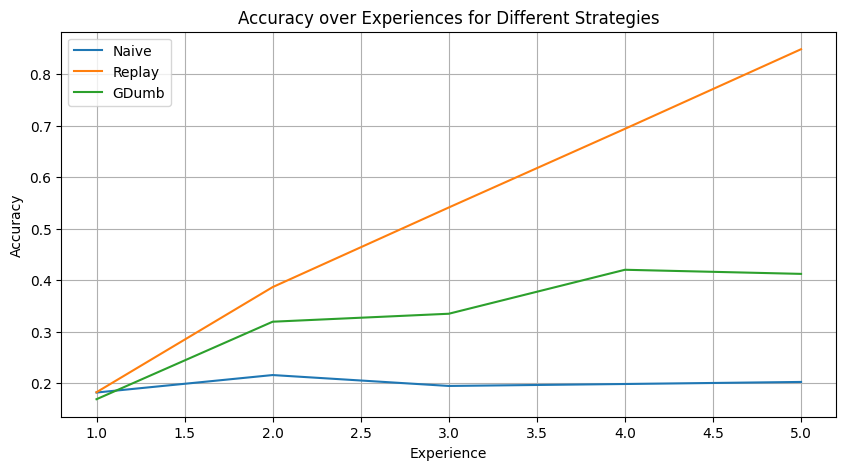

In [9]:
import torch
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torchvision import transforms
from avalanche.benchmarks.classic import SplitMNIST
from avalanche.models import SimpleMLP
from avalanche.training.supervised import Naive, Replay, GDumb
from avalanche.logging import InteractiveLogger, TextLogger
from avalanche.training.plugins import EvaluationPlugin
from avalanche.evaluation.metrics import accuracy_metrics, loss_metrics, forgetting_metrics, timing_metrics, cpu_usage_metrics
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformation for the MNIST dataset
transform = transforms.Compose([
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the SplitMNIST benchmark with 5 tasks
benchmark = SplitMNIST(n_experiences=5, seed=1, return_task_id=False, train_transform=transform, eval_transform=transform)

# Function to create a new model for each strategy
def create_model():
    return SimpleMLP(num_classes=10)

# Define the evaluation plugin
interactive_logger = InteractiveLogger()
text_logger = TextLogger(open('log.txt', 'w'))
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(epoch=True, experience=True, stream=True),
    loss_metrics(epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    timing_metrics(experience=True, stream=True),
    cpu_usage_metrics(experience=True, stream=True),
    loggers=[interactive_logger, text_logger]
)

# Function to run a strategy
def run_strategy(strategy_name, strategy):
    print(f"Running {strategy_name} strategy")
    accuracy_stream = []

    for experience in benchmark.train_stream:
        print("Start of experience ", experience.current_experience)
        print("Current Classes: ", experience.classes_in_this_experience)

        # Train on the current experience
        strategy.train(experience)

        # Evaluate on the training and test streams
        results = strategy.eval(benchmark.test_stream)
        accuracy_stream.append(results['Top1_Acc_Stream/eval_phase/test_stream/Task000'])

    return accuracy_stream

# Define strategies
strategies = {
    'Naive': Naive(
        model=create_model(),
        optimizer=SGD(create_model().parameters(), lr=0.01, momentum=0.9),
        criterion=CrossEntropyLoss(),
        train_mb_size=64,
        train_epochs=1,
        eval_mb_size=64,
        device=device,
        evaluator=evaluation_plugin
    ),
    'Replay': Replay(
        model=create_model(),
        optimizer=SGD(create_model().parameters(), lr=0.01, momentum=0.9),
        criterion=CrossEntropyLoss(),
        mem_size=200,  # memory buffer size
        train_mb_size=64,
        train_epochs=1,
        eval_mb_size=64,
        device=device,
        evaluator=evaluation_plugin
    ),
    'GDumb': GDumb(
        model=create_model(),
        optimizer=SGD(create_model().parameters(), lr=0.01, momentum=0.9),
        criterion=CrossEntropyLoss(),
        mem_size=200,  # memory buffer size
        train_mb_size=64,
        eval_mb_size=64,
        device=device,
        evaluator=evaluation_plugin
    )
}

# Run strategies and store results
results = {}
for strategy_name, strategy in strategies.items():
    accuracy_stream = run_strategy(strategy_name, strategy)
    results[strategy_name] = accuracy_stream

# Plot results
plt.figure(figsize=(10, 5))
for strategy_name, accuracy_stream in results.items():
    plt.plot(range(1, len(accuracy_stream) + 1), accuracy_stream, label=strategy_name)

plt.xlabel('Experience')
plt.ylabel('Accuracy')
plt.title('Accuracy over Experiences for Different Strategies')
plt.legend()
plt.grid(True)
plt.show()
